<a href="https://colab.research.google.com/github/WeiKuoLi/Neural-Network-Bootcamp/blob/main/NN_EXERCISE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Networks
This is part 1 of a gentle introduction on neural networks for Theta's book club.

# Linear Fitting: One Feature to One Output

Epoch 0: Loss = 1.0902, W = 0.8973, B = -0.6652
Epoch 40: Loss = 0.3265, W = 1.5876, B = -0.9564
Epoch 80: Loss = 0.1180, W = 1.9827, B = -1.0056
Epoch 120: Loss = 0.0502, W = 2.2102, B = -1.0107
Epoch 160: Loss = 0.0277, W = 2.3414, B = -1.0092
Epoch 200: Loss = 0.0202, W = 2.4171, B = -1.0074
Epoch 240: Loss = 0.0177, W = 2.4609, B = -1.0062
Epoch 280: Loss = 0.0169, W = 2.4861, B = -1.0054
Epoch 320: Loss = 0.0166, W = 2.5007, B = -1.0050
Epoch 360: Loss = 0.0165, W = 2.5092, B = -1.0048


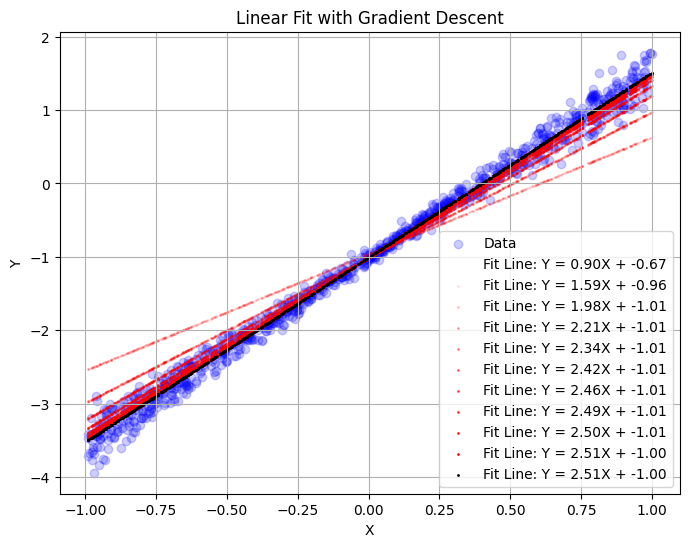

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate 1000 data points
np.random.seed(42)  # for reproducibility
true_W = 2.5  # True slope
true_B = -1.0  # True intercept
X = np.random.uniform(-1, 1, 1000)  # Input data
noise = np.random.normal(0, 2, 1000) * 0.1  # Add some noise
noise1 = np.random.normal(0, 2, 1000) * 0.03   # Add some noise
Y = (true_W + noise) * X + true_B + noise1  # Generate output data with noise

# Step 2: Initialize parameters for gradient descent
W = np.random.randn()  # Random initialization of W
B = np.random.randn()  # Random initialization of B
learning_rate = 0.02  # Learning rate
epochs = 400  # Number of iterations

# Step 3: Perform gradient descent
for epoch in range(epochs):
    # Predictions
    Y_pred = W * X + B

    # Compute loss (MSE)
    loss = np.mean((Y_pred - Y) ** 2)

    # Compute gradients
    grad_W = 2 * np.mean(X * (Y_pred - Y))
    grad_B = 2 * np.mean(Y_pred - Y)

    # Update parameters
    W -= learning_rate * grad_W
    B -= learning_rate * grad_B

    # Print loss every 50 epochs
    if epoch % 40 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}, W = {W:.4f}, B = {B:.4f}")
        if epoch == 0:
            # Step 4: Plot results
            plt.figure(figsize=(8, 6))
            plt.scatter(X, Y, label="Data", color="blue", alpha=0.2)
        plt.scatter(X, W * X + B, label=f"Fit Line: Y = {W:.2f}X + {B:.2f}", color="red", alpha=epoch/epochs,s=1)

plt.scatter(X, W * X + B, label=f"Fit Line: Y = {W:.2f}X + {B:.2f}", color="black", alpha=epoch/epochs,s=1)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Fit with Gradient Descent")
plt.legend()
plt.grid()
plt.show()


# Nonlinear Fitting: One Feature to One Output

Epoch 0: Loss = 2.1646, W = 0.2491, B = 0.0676
Epoch 100: Loss = 0.0043, W = 0.5599, B = 0.5154
Epoch 200: Loss = 0.0041, W = 0.5452, B = 0.5334
Epoch 300: Loss = 0.0041, W = 0.5424, B = 0.5369
Epoch 400: Loss = 0.0041, W = 0.5417, B = 0.5377
Epoch 500: Loss = 0.0041, W = 0.5416, B = 0.5378
Epoch 600: Loss = 0.0041, W = 0.5416, B = 0.5379
Epoch 700: Loss = 0.0041, W = 0.5416, B = 0.5379
Epoch 800: Loss = 0.0041, W = 0.5416, B = 0.5379


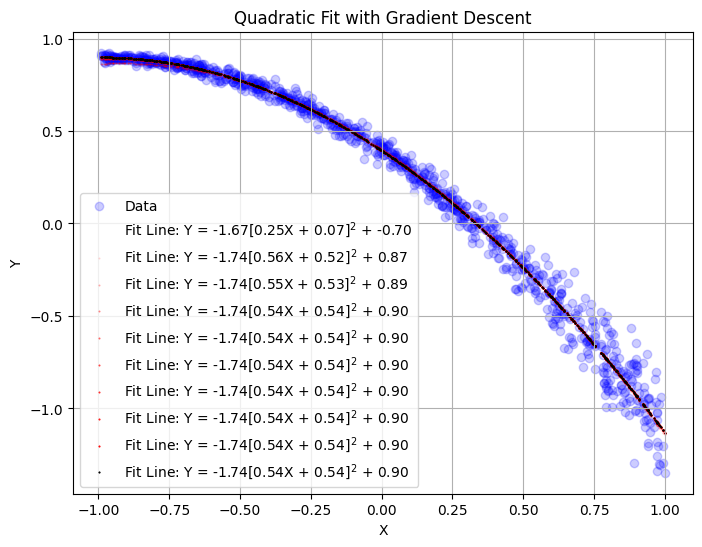

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate 1000 data points
np.random.seed(42)  # for reproducibility
true_W = .6  # True slope
true_B = .6  # True intercept

true_W2 = -1.4  # True slope 2
true_B2 = .9  # True intercept 2
X = np.random.uniform(-1, 1, 1000)  # Input data

noise00 = np.random.normal(0, 1, 1000) * 0.04  # Add some noise
noise01 = np.random.normal(0, 1, 1000) * 0.02   # Add some noise

noise10 = np.random.normal(0, 1, 1000) * 0.03  # Add some noise
noise11 = np.random.normal(0, 1, 1000) * 0.01   # Add some noise

Y = (true_W + noise00) * X + true_B + noise01  # Generate output data with noise
Y = Y ** 2
Y = (true_W2 + noise10) * Y + true_B2 + noise11  # Generate output data with noise

# Step 2: Initialize parameters for gradient descent
W, B, W2, B2 =  np.random.randn(4)  # Random initialization
epochs = 900  # Number of iterations

learning_rate = 0.1
# Step 3: Perform gradient descent
for epoch in range(epochs):
    # Predictions
    Z_pred = W * X + B    # 1st linear layer
    A_pred = Z_pred ** 2  # nonlinear "activation"
    Y_pred = W2 * A_pred + B2 # 2nd linear layer


    # Compute loss (MSE)
    loss = np.mean((Y_pred - Y) ** 2)

    # Compute gradients
    grad_W2 = 2 * np.mean(A_pred * (Y_pred - Y))
    grad_B2 = 2 * np.mean(Y_pred - Y)
    #
    grad_Z = 2 *((2 * Z_pred) * W2 * (Y_pred - Y))
    #
    grad_W = np.mean(X * grad_Z)
    grad_B = np.mean(grad_Z)

    # Update parameters
    W -= learning_rate * grad_W
    B -= learning_rate * grad_B

    W2 -= learning_rate * grad_W2
    B2 -= learning_rate * grad_B2

    # Print loss every 50 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}, W = {W:.4f}, B = {B:.4f}")
        if epoch == 0:
            # Step 4: Plot results
            plt.figure(figsize=(8, 6))
            plt.scatter(X, Y, label="Data", color="blue", alpha=0.2)
        plt.scatter(X, W2*(W * X + B)**2+B2, label=fr"Fit Line: Y = {W2:.2f}[{W:.2f}X + {B:.2f}]$^2$ + {B2:.2f}", color="red", alpha=epoch/epochs,linewidth=0.5, s=1)

plt.scatter(X, W2*(W * X + B)**2+B2, label=fr"Fit Line: Y = {W2:.2f}[{W:.2f}X + {B:.2f}]$^2$ + {B2:.2f}", color="black", alpha=epoch/epochs,linewidth=0.5, s=1)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Quadratic Fit with Gradient Descent")
plt.legend()
plt.grid()
plt.show()


# Neural Networks
Please see the following implementation of a simple neural network for classifying digits

*   https://www.youtube.com/watch?v=w8yWXqWQYmU&t=349s
*   https://www.kaggle.com/code/wwsalmon/simple-mnist-nn-from-scratch-numpy-no-tf-keras


# Homeworks
[❄️ = difficulty]

For **NN EXERCISE notebook**:
* ❄️ quadratic fitting layer $y = ax^2 + bx + c$

For **simple neural network notebook**:
* ❄️ There are 3-4 mistakes within the notebook, try to find it and get test accuracy to 91%
* ❄️ Replace Relu with Sigmoid, which is better?
* ❄️❄️ Implement **Mean Square Error(MSE)**, does it improve our model or not?
* ❄️❄️❄️ Implement a FullyConnectedNN class for arbitrary layers of Neural Network. Hint: Use lists to keep track of W_i, B_i, dW_i, dB_i, dZ_i of ith layer

# Ending remarks
The homework is not mandatory, but it is strongly encouraged to help reinforce the concepts you’ve learned so far. You are also welcome to share your solutions with the rest of the book club before Part 2 of our bootcamp begins—this is a great opportunity to collaborate, exchange ideas, and get feedback. Have fun with the exercises, and don’t be afraid to experiment with different approaches.

Looking forward to seeing your progress, and excited to dive into Part 2 together! Happy coding! 🚀

# Teaser for Part 2
Now that we are familiar with the theoretical foundations, in Part 2, we’ll level up! Get ready to:
* Learn about basics for pytorch
* Build a chess bot with a simple neural network
* How to interact with other codebase
* Learn about API
* Deploy the chess bot on https://lichess.org/ and play!